# TP 3 Régression logistique
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#implémentation du cout de sklearn pour la comparer avec la notre 
from sklearn.metrics import log_loss
#implémentation du model de sklearn pour la comparer avec le notre 
from sklearn.linear_model import LogisticRegression

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];

In [4]:
print('X', X.shape ,' y ', y.shape)

X (100, 3)  y  (100,)


# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [5]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z))

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [6]:
# fonction pour le calcule du cout 
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    pred=np.dot(X,theta)
    y_pred=Sigmoid(pred)
    cost=-(y[:,None]*np.log(y_pred)+(1-y[:,None])*np.log(1-y_pred))
    return np.mean(cost)
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [7]:
#fonction pour le calcule de la derivé du cout 
def get_deriv(X, y, theta):
    pred=Sigmoid(np.dot(X,theta))-(y[:,None])
    A=np.transpose(X)
    deriv=np.dot(A,pred)
    return deriv/(X.shape[0])
# pour la descente du gradient de plus de la valeur optimiser de theta on retourne aussi des données pour les exploité dans 
# des graphes 
# une liste de touts les thetas calculé
#une liste des cout calculé pour chaque theta
def gradientDescent(X, y, theta, alpha, iterations,early_stopping=False):
    thetas=[]
    cost_history=[]
    epsilon = 1e-9
    for i in range(0,iterations):
        deriv=get_deriv(X, y, theta) 
        theta=theta - alpha*deriv        
        thetas.append(theta)
        cost_history.append(computeCost(X, y, theta))
        #on s'arrete si le changement du cout entre iteration est trés petit 
        if early_stopping and i > 0 and (cost_history[-2] - cost_history[-1]) < epsilon: 
            break
    return theta,thetas,cost_history
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [8]:
n=X.shape[1]
theta = np.zeros((n, 1))
theta


array([[0.],
       [0.],
       [0.]])

Calculer le cout initial

In [9]:
initialCost=computeCost(X, y, theta)

Appel des la fonction de calcul du gradient

In [10]:
n=X.shape[1]
theta = np.zeros((n, 1))
theta
# paramètres
iterations = 15000;
alpha = 0.01;
# Appel
theta,thetas,costs = gradientDescent(X, y, theta, alpha, iterations);
print(theta)

[[-6.27932689]
 [ 0.29399957]
 [ 0.25823414]]


Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

<function matplotlib.pyplot.show(close=None, block=None)>

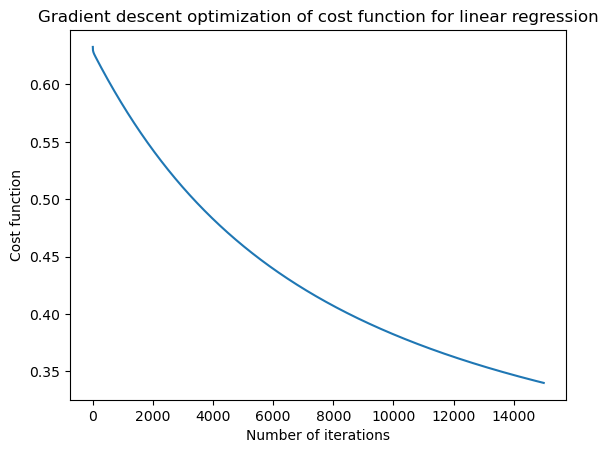

In [11]:
#graphe de l'evolution du cout par rapport aux nombre d'iteration
plt.plot(range(len(costs)), costs)
plt.xlabel("Number of iterations")
plt.ylabel("Cost function")
plt.title("Gradient descent optimization of cost function for linear regression")
plt.show

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [12]:
#fonction pour choisir la classe de la données selon la proba retourner par le model et un seuil choisit
def predict( X,theta,th=0.5 ) : 
    intercept=np.ones((X.shape[0],1))
    X=np.column_stack((intercept,X))
    Z = Sigmoid(np.dot(X,theta)) 
    Y = np.where( Z > th, 1, 0 )        
    return Y

In [13]:
def drawLine(X,theta):
    # creer l'intervalles des données
    min1, max1 = X[:, 1].min()-1, X[:, 1].max()+1
    min2, max2 = X[:, 2].min()-1, X[:, 2].max()+1
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    # creation de la grille
    xx, yy = np.meshgrid(x1grid, x2grid)
    # transformation de la grille en vecteur 
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # concatener les données pour avoir les deux  caractéristique x1,x2
    grid = np.hstack((r1,r2))

    #generation des prediction 
    yhat = predict( grid,theta )

    # transformer  les predictions en grille
    zz = yhat.reshape(xx.shape)
    # afficher la grille avec la limite de la decision 
    plt.contourf(xx, yy, zz, cmap='Paired')
    # creation des points de chaque classe 
    plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')
    plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
    plt.show()

# Affichage 
Graphe representant les acceptations selon les caracteristiques

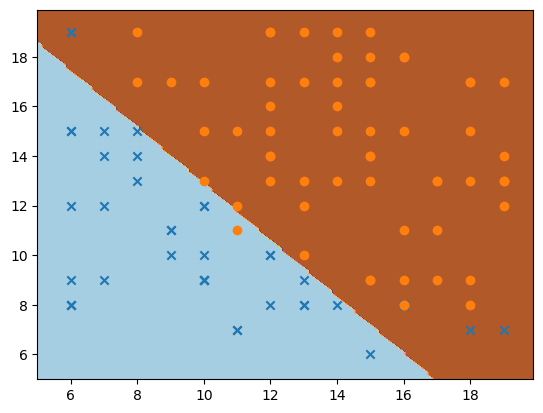

In [14]:
drawLine(X,theta)

Traçage du coût en fonction de theta0 et theta1

Prédire des valeurs de y

In [15]:
# Predire pour des notes note1= 9 et note2=17
predict( np.array([[9,17]]),theta,th=0.5 )

array([[1]])

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [16]:
print("algorithme sklearn")
clf = LogisticRegression()
clf.fit(X[:,1:], y)
print("les parametres")
print(clf.intercept_,clf.coef_)
y_pred=clf.predict_proba (X[:,1:])
bce = log_loss(y, y_pred)

print('Binary Cross-Entropy:', bce)

print("notre algorithme ")
n=X.shape[1]
theta = np.zeros((n, 1))
theta
# paramètres
iterations = 13000;
alpha = 0.1;
# Appel
theta,thetas,costs = gradientDescent(X, y, theta, alpha, iterations);
print("les parametres")
print(theta)
cost = computeCost(X, y, theta)
print('Binary Cross-Entropy:', cost)

algorithme sklearn
les parametres
[-21.99921734] [[0.9454333 0.9100324]]
Binary Cross-Entropy: 0.20681905133113965
notre algorithme 
les parametres
[[-21.95498414]
 [  0.94403571]
 [  0.90868009]]
Binary Cross-Entropy: 0.20684935749452418


on retrouve aprés ajustement des hyperparametres que notre approche retourne des resultat quasiment identique a sklearn

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

Au lieu d'utiliser l'algorithme de descente de gradient classique qui calcule le gradient sur l'ensemble des données d'entraînement,on  utilise la descente de gradient mini-batch en divisant l'ensemble de données d'entraînement en petits lots (mini-batch). Cela permettra de réduire le temps d'entraînement et d'améliorer la convergence du modèle. 

In [17]:
def miniBatchGradientDescent(X, y, theta, alpha, iterations, batch_size, early_stopping=False):
    thetas = []
    cost_history = []
    epsilon = 1e-9
    num_batches = int(np.ceil(X.shape[0] / batch_size)) #calcule de nombre de mini-batch

    for i in range(iterations):
        for j in range(num_batches):
            #definition du début et de la fin du mini-batch
            start = j * batch_size
            end = min(start + batch_size, X.shape[0])
            # calcule de la dériver puis mise a jour de theta en utilisant le mini batch
            X_batch = X[start:end]
            y_batch = y[start:end]
            deriv = get_deriv(X_batch, y_batch, theta)
            theta = theta - alpha * deriv

        thetas.append(theta)
        cost_history.append(computeCost(X, y, theta))
        if early_stopping and i > 0 and (cost_history[-2] - cost_history[-1]) < epsilon:
            break

    return theta, thetas, cost_history

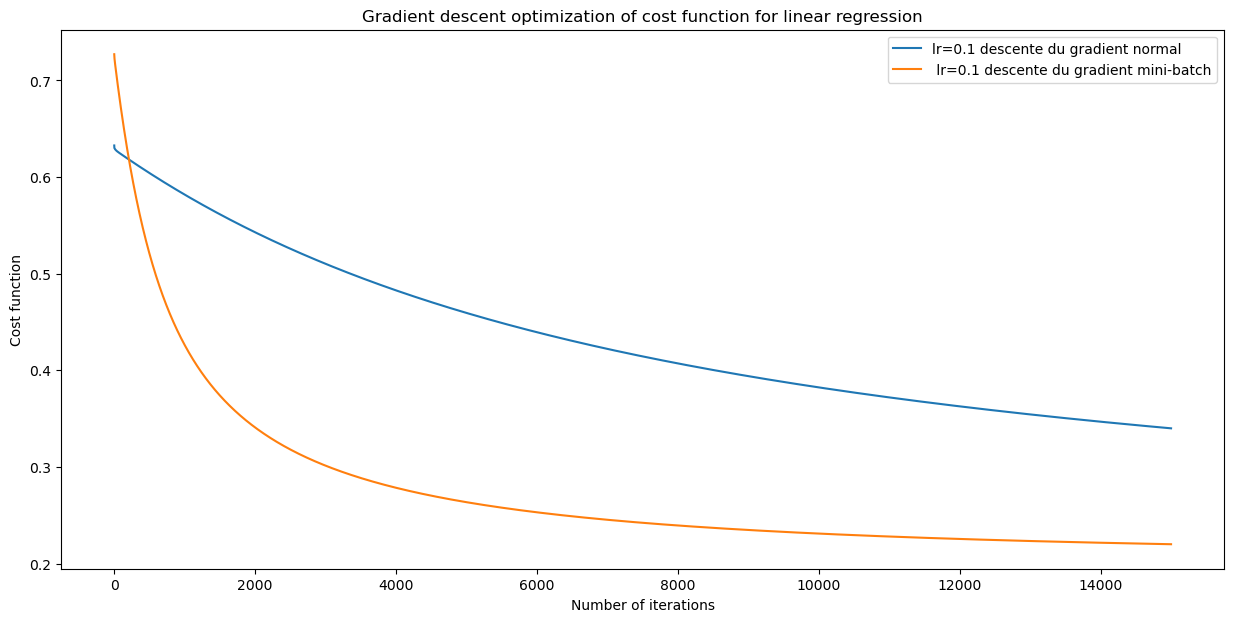

In [18]:
#normal
n=X.shape[1]
theta = np.zeros((n, 1))
theta
# paramètres
iterations = 15000;
alpha = 0.01;
# Appel
theta,thetas,costs = gradientDescent(X, y, theta, alpha, iterations);
#mini batch
theta = np.zeros((3, 1))
iterations = 15000
alpha = 0.01
# Appel
theta,thetas,cost_history_s = miniBatchGradientDescent(X, y, theta, alpha, iterations, 10)
theta = np.zeros((3, 1),dtype=np.longlong)
#graphe de comparaison 
plt.figure(figsize=(15, 7))
plt.plot(range(len(costs)), costs,label='lr=0.1 descente du gradient normal')
plt.xlabel("Number of iterations")
plt.ylabel("Cost function")
plt.plot(range(len(cost_history_s)), cost_history_s,label=' lr=0.1 descente du gradient mini-batch')
plt.xlabel("Number of iterations")
plt.ylabel("Cost function")
plt.legend()
plt.title("Gradient descent optimization of cost function for linear regression")
plt.show()

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Avril 2023


In [19]:
# bonne chance